Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **DateoFdeath**: дата смерти

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

## Часть 1. Анализ и предобработка данных

Загружаем датасет

In [ ]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...

From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3

To: /content/game_of_thrones_test.csv

100% 37.3k/37.3k [00:00<00:00, 40.8MB/s]

Downloading...

From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v

To: /content/game_of_thrones_train.csv

100% 138k/138k [00:00<00:00, 10.6MB/s]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data = pd.read_csv('game_of_thrones_train.csv', index_col=["S.No"])
data = data.drop_duplicates()
data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>

Index: 1557 entries, 1 to 1557

Data columns (total 25 columns):

 #   Column            Non-Null Count  Dtype  

---  ------            --------------  -----  

 0   name              1557 non-null   object 

 1   title             717 non-null    object 

 2   male              1557 non-null   int64  

 3   culture           488 non-null    object 

 4   dateOfBirth       279 non-null    float64

 5   mother            18 non-null     object 

 6   father            22 non-null     object 

 7   heir              21 non-null     object 

 8   house             1176 non-null   object 

 9   spouse            200 non-null    object 

 10  book1             1557 non-null   int64  

 11  book2             1557 non-null   int64  

 12  book3             1557 non-null   int64  

 13  book4             1557 non-null   int64  

 14  book5             1557 non-null   int64  

 15  isAliveMother     18 non-null     float64

 16  isAliveFather     22 non-n

In [ ]:
display(data.shape)
data.isnull().sum()

(1557, 25)

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


Text(0.5, 1.0, 'Карта missing values')

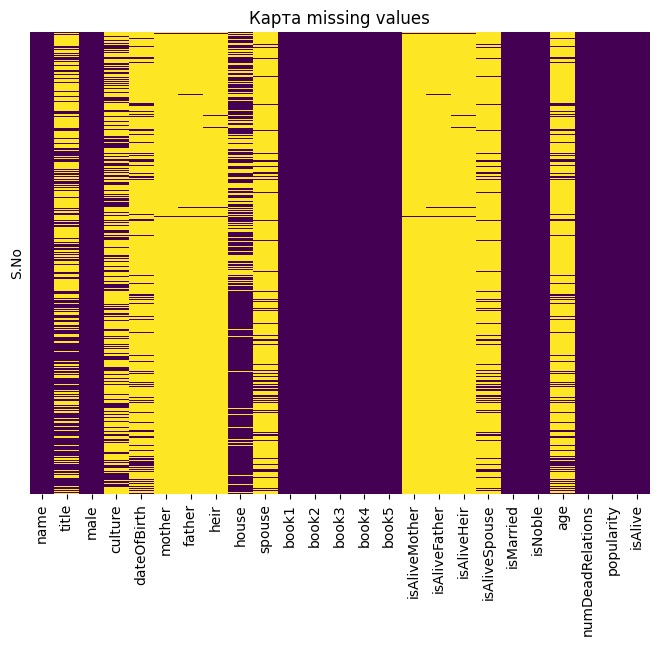

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Карта missing values")

Признак `name` не несет никакой смысловой нагрузки для нашей задачи, поэтому его можно удалить. Также признаки `mother`, `father`, `heir`, `spouse` имеют значительное количество пропусков. Можно рассмотреть и их удаление. Признаки, связанные с семейными связями, живыми родственниками, возрастом, датой рождения и социальным статусом могут влиять на вероятность смерти персонажа.

In [ ]:
data['isPopular'] = (data['popularity'] > 0.5).astype(int)
data['boolDeadRelations'] = (data['numDeadRelations'] > 0).astype(int)

In [ ]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
    'Ironborn': ['ironborn', 'ironmen']
}

survival_groups = {
    'High Political Influence': ['westerosi', 'andal', 'westermen', 'valemen', 'stormlander', 'reach', 'braavosi'],
    'Warrior Clans and Tough Fighters': ['northmen', 'ironborn', 'free folk', 'dornish', 'rivermen', 'vale', 'ghiscari', 'dothraki', 'northern mountain clans'],
    'Sea People and Merchants': ['lysene', 'summer islands', 'myrish', 'tyroshi', 'norvoshi', 'qohor', 'pentoshi'],
    'Vulnerable or Isolated Groups': ['lhazarene', 'ghiscari', 'qartheen',  'astapori', 'meereenese', 'lhazareen'],
    'Magical or Exotic Background': ['valyrian', 'qartheen'],
    'Minor or Isolated Peoples with Escape Potential': ['sistermen', 'crannogmen']
}


In [ ]:
def simplify_culture(culture, cult):
  if pd.isna(culture):
    return 'Unknown'
  culture = culture.lower()
  for key, values in cult.items():
    if any(value in culture for value in values):
      return key
  return culture


data['culture_simplified'] = data['culture'].apply(simplify_culture, args=(cult,))
data['culture_simplified'] = data['culture_simplified'].apply(simplify_culture, args=(survival_groups,))
data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations,culture_simplified
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,NaN,0,0,NaN,11,0.605351,0,1,1,unknown
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,1.0,1,1,97.0,1,0.896321,1,1,1,Warrior Clans and Tough Fighters
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,0,1,NaN,0,0.267559,1,0,0,unknown
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,0.0,1,1,23.0,0,0.183946,0,0,0,unknown
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,1.0,1,1,29.0,0,0.043478,1,0,0,Warrior Clans and Tough Fighters


Наш выбор - это `age`, `male`, `house`, `isNoble`, `book1-5`, `numDeadRelations`, `isMarried`, `isPopular`. А еще можно что-то выжать из признаков `dateOfBirth` и `DateoFdeath`. После анализа признаков, задуматься над удалением `title`. Поэтому в предварительном анализе из игры выбывают признаки `name`, `mother`, `father`, `heir`, `spouse`

In [ ]:
data.columns

Index(['name', 'title', 'male', 'culture', 'dateOfBirth', 'mother', 'father',
       'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity',
       'isAlive', 'isPopular', 'boolDeadRelations', 'culture_simplified'],
      dtype='object')

In [ ]:
data.drop(columns=['name', 'mother', 'father', 'heir', 'spouse', 'culture',
                   'isAliveMother', 'isAliveFather', 'isAliveHeir',
                   'isAliveSpouse'], inplace = True)

In [ ]:
data['isAlive'].dtype

dtype('int64')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

  data_subset = grouped_data.get_group(pd_key)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

  data_subset = grouped_data.get_group(pd_key)


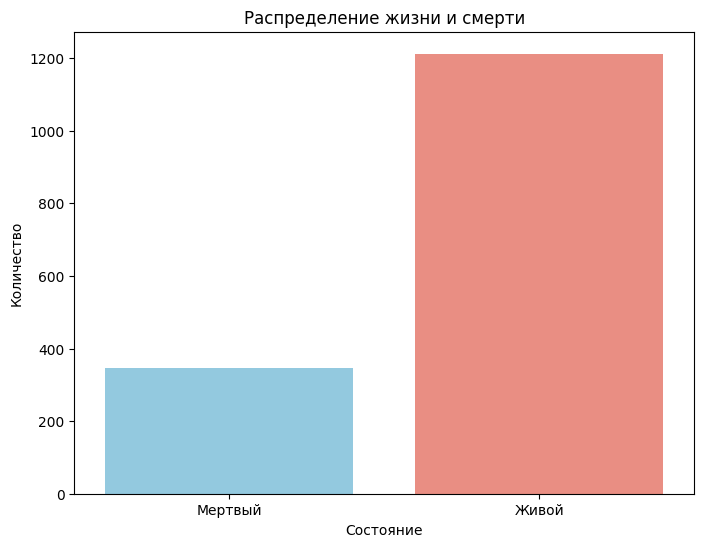

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='isAlive', hue='isAlive', data=data, palette=['skyblue', 'salmon'], legend=False)
plt.title('Распределение жизни и смерти')
plt.xlabel('Состояние')
plt.ylabel('Количество')
plt.xticks([1, 0], ['Живой', 'Мертвый'])
print()

Наблюдается дисбаланс классов. Что можно с этим сделать? Сгенерировать или удалить данные, использовать ансамьли и алгоритмы устойчивые к выбросам. Использовать кроссвалидацию с балансом классов для лучшей оценки модели. Поиграть с порогом вероятности принятия решения

Изменим последовательность работы :)

In [ ]:
data.describe()

,male,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
count,1557.000000,279.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,279.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000
mean,0.590880,247.551971,0.138728,0.327553,0.431599,0.562620,0.330122,0.128452,0.439306,35.290323,0.187540,0.062400,0.778420,0.017341,0.044316
std,0.491829,61.550441,0.345774,0.469472,0.495458,0.496223,0.470408,0.334700,0.496462,26.364864,1.114648,0.121416,0.415443,0.130581,0.205862
min,0.000000,-25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,241.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.013378,1.000000,0.000000,0.000000
50%,1.000000,272.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.023411,1.000000,0.000000,0.000000
75%,1.000000,286.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,49.000000,0.000000,0.063545,1.000000,0.000000,0.000000
max,1.000000,299.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000,1.000000,1.000000


Предварительный анализ числовых признаков: Большенство персонажей не встречались в первой, второй и третьей книге. Но появлялись в четвертой, где видемо и умерли, так как пропали в пятой. Из странностей: минимальный `dateOfBirth: -25?` и `age: 0` Надо посмотреть на это. Скорее всего придется удалить эти строчки. Что делать с `dateofBirth` и `age`?

Есть идея привести классы к балансу, путем удаления строк, где `age` & `dataofBirth` is NaN. А пока запаолню их через ближайших соседей. Возможно можно даже разбить на категории. Возможно стоит рассмотреть разбивку на категории

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
data[['age', 'dateOfBirth']] = imputer.fit_transform(data[['age', 'dateOfBirth']])
data[['age', 'dateOfBirth']] = data[['age', 'dateOfBirth']].astype(int)

In [ ]:
data[data['dateOfBirth'] < 0]

,title,male,dateOfBirth,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations,culture_simplified
S.No,,,,,,,,,,,,,,,,,,
88,Queen,0,-25,House Targaryen,1,0,0,0,0,1,1,35,1,0.277592,0,0,1,Magical or Exotic Background


In [ ]:
data[data['age'] == 0]

,title,male,dateOfBirth,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations,culture_simplified
S.No,,,,,,,,,,,,,,,,,,
330,Prince,1,105,House Targaryen,0,0,0,0,0,0,1,0,0,0.100334,0,0,0,Magical or Exotic Background
791,NaN,1,248,House Martell,0,0,0,1,0,0,0,0,0,0.066890,0,0,0,unknown


Удалим эти строчки

In [ ]:
data = data[data['dateOfBirth'] > 0]
data = data[data['age'] > 0]

In [ ]:
data.describe()

,male,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
count,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000
mean,0.590734,247.364865,0.138353,0.328185,0.432432,0.563063,0.330759,0.128057,0.438867,35.097169,0.187259,0.062234,0.779923,0.017375,0.043758
std,0.491857,24.848804,0.345381,0.469704,0.495573,0.496167,0.470638,0.334260,0.496408,11.084129,1.115514,0.121407,0.414432,0.130704,0.204622
min,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,247.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,0.000000,0.013378,1.000000,0.000000,0.000000
50%,1.000000,247.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,35.000000,0.000000,0.023411,1.000000,0.000000,0.000000
75%,1.000000,247.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,35.000000,0.000000,0.063545,1.000000,0.000000,0.000000
max,1.000000,299.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000,1.000000,1.000000


Пошли по категориальным

In [ ]:
data.describe(include=['O'])

,title,house,culture_simplified
count,715,1173,1554
unique,195,315,7
top,Ser,House Frey,unknown
freq,306,89,1068


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

  data_subset = grouped_data.get_group(pd_key)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

  data_subset = grouped_data.get_group(pd_key)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

  data_subset = grouped_data.get_group(pd_key)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

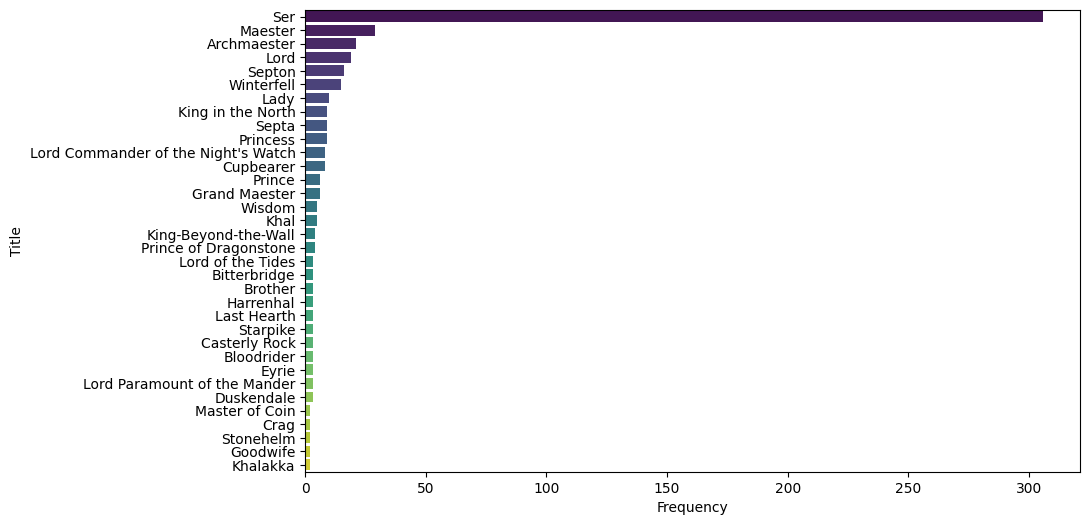

In [ ]:
title_stats = data['title'].value_counts()
top_10 = title_stats.head(34)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10.values, y=top_10.index, palette='viridis', hue=top_10.index, dodge=False, legend=False)
plt.xlabel('Frequency')
plt.ylabel('Title')
plt.show()

In [ ]:
data['title'].fillna('Other', inplace=True)
title_counts = data['title'].value_counts()
data['title'] = data['title'].apply(lambda x: x if title_counts[x] >= 3 else 'Other')

empty_categories = ['Brother', 'Cupbearer']
data['title'] = data['title'].apply(lambda x: x if x not in empty_categories else 'Other')

<ipython-input-22-7f560ada1e08>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.

The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





  data['title'].fillna('Other', inplace=True)


In [ ]:
data['title'].nunique()

28

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

  data_subset = grouped_data.get_group(pd_key)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

  data_subset = grouped_data.get_group(pd_key)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

  data_subset = grouped_data.get_group(pd_key)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

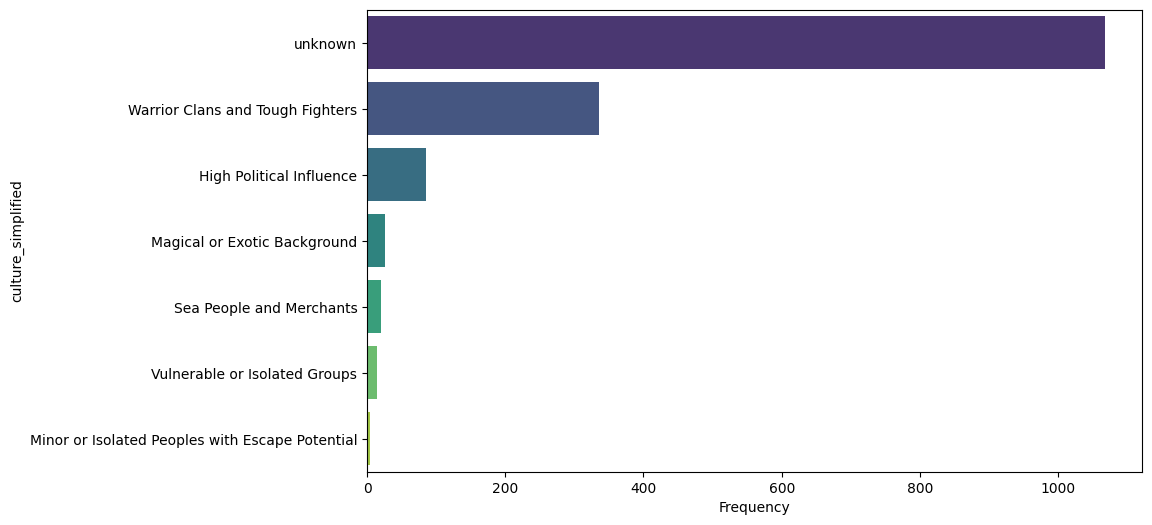

In [ ]:
stats = data['culture_simplified'].value_counts()
top_10 = stats.head(34)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10.values, y=top_10.index, palette='viridis', hue=top_10.index, dodge=False, legend=False)
plt.xlabel('Frequency')
plt.ylabel('culture_simplified')
plt.show()

In [ ]:
data['house'].fillna('Other', inplace=True)
title_counts = data['house'].value_counts()
data['house'] = data['house'].apply(lambda x: x if title_counts[x] >= 5 else 'Other')
data['house'].nunique()

<ipython-input-25-ebf39213141c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.

The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





  data['house'].fillna('Other', inplace=True)


56

In [ ]:
data_encoded = pd.get_dummies(data, columns=['title', 'culture_simplified', 'house'], drop_first=False)
data_encoded = data_encoded.drop(columns=['title_Other', 'house_Other', 'culture_simplified_unknown'])
data_encoded.head()

,male,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,...,house_House Waynwood,house_House Webber,house_House Westerling,house_House Whent,house_House Wylde,house_House of Loraq,house_Kingsguard,house_Night's Watch,house_Second Sons,house_Stone Crows
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,247,0,0,0,0,0,0,0,35,...,False,False,False,False,False,False,False,False,False,False
2,1,208,1,1,1,1,1,1,1,97,...,False,False,False,False,False,False,False,False,False,False
3,1,247,0,0,0,1,0,0,1,35,...,False,False,False,False,False,False,False,False,False,False
4,0,82,0,0,0,0,0,1,1,23,...,False,False,False,False,False,False,False,False,False,False
5,0,276,0,0,0,1,0,1,1,29,...,False,False,False,False,False,False,False,False,False,False


С категориальными признаками вроде бы покончено

Пошли по корреляции?

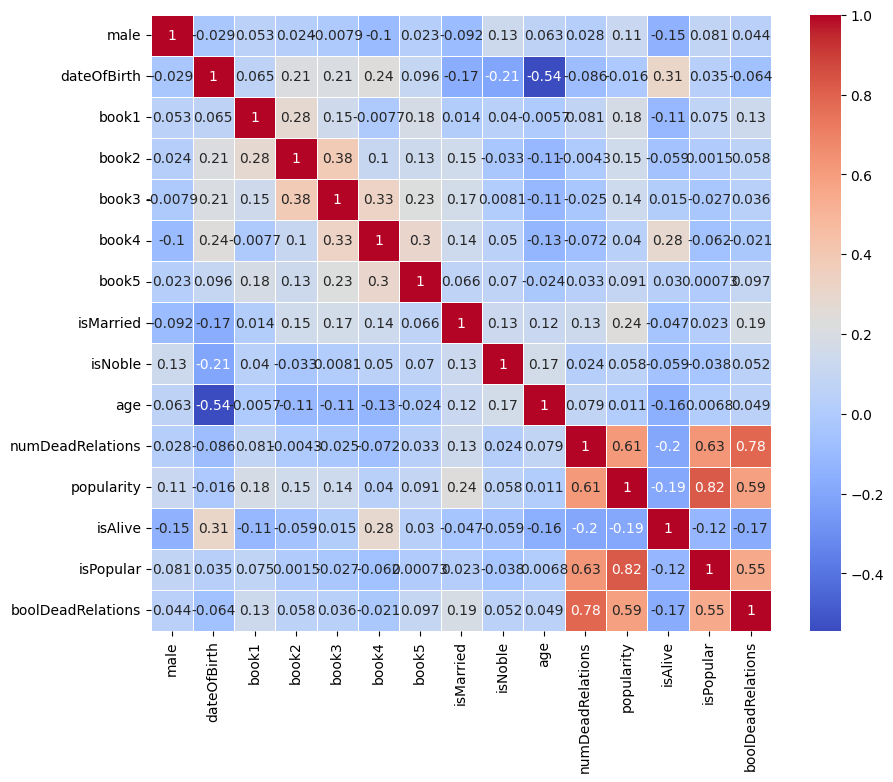

In [ ]:
corr_map = data.select_dtypes(include='number').corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_map, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

Выводы по корреляционной матрице: `isPopular` и `boolDeadRelations` коррелируют с признаками `popularity` и `numDeadRelations` (что очевидно). Очень много признаков, что не коррелируют с целевой переменной, что не есть хорошо

На самом деле матрица корреляции уже показывает влияние признаков на целевую переменную. И самыми яркими признаками являются `dateOfBirth` и `book4`. Рассмотрим распределение выжившик по таким признакам, как `male`, `book1-5`, `isMarried`, `isNoble`, `numDeadRelations`

In [ ]:
alive_true = ((data['isAlive'] == True) & (data['book1'] == True)).sum()
alive_true

143

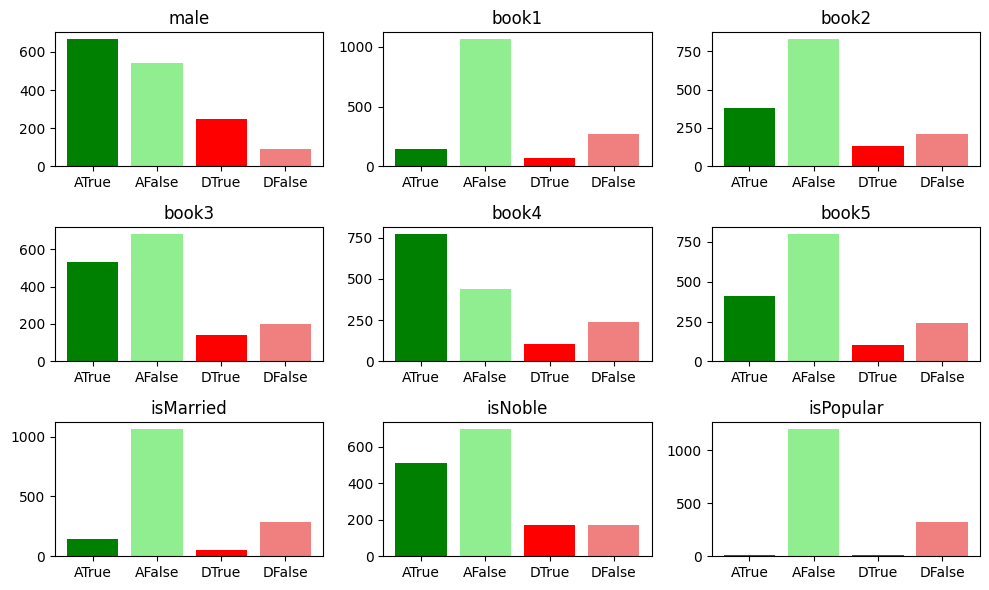

In [ ]:
bool_columns = ['male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isMarried', 'isNoble', 'isPopular']

fig, axes = plt.subplots(3, 3, figsize=(10, 6))
axes = axes.flatten()
for i, column in enumerate(bool_columns):
    alive_true = ((data['isAlive'] == True) & (data[column] == True)).sum()
    alive_false = ((data['isAlive'] == True) & (data[column] == False)).sum()
    dead_true = ((data['isAlive'] == False) & (data[column] == True)).sum()
    dead_false = ((data['isAlive'] == False) & (data[column] == False)).sum()

    axes[i].bar(['ATrue', 'AFalse', 'DTrue', 'DFalse'],
                [alive_true, alive_false, dead_true, dead_false],
                color=['green', 'lightgreen', 'red', 'lightcoral'])
    axes[i].set_title(f"{column}")

for j in range(len(bool_columns), 9):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Выводы: Большенство живых не встречалось в `book1`, `book2`. Еще больше всех живых безбрачных.

In [ ]:
X = data_encoded.drop(['isAlive'], axis=1)
y = data_encoded['isAlive']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, shuffle=True)

## Часть 2. Обучение моделей

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
logistic_regression = LogisticRegression(C=1, penalty='l2', max_iter=2000)

logistic_regression.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=2000)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
adaboost = AdaBoostClassifier(n_estimators=50, algorithm='SAMME')

adaboost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME')

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
gaussian_process = GaussianProcessClassifier()

gaussian_process.fit(X_train, y_train)

GaussianProcessClassifier()

In [ ]:
naive_bayes = GaussianNB()

naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
svc = SVC(kernel='linear')

svc.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred_train = logistic_regression.predict(X_train)
y_pred_test = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy train: %.4f" % accuracy_train)
print("Accuracy test: %.4f" % accuracy_test)

Accuracy train: 0.8520

Accuracy test: 0.7492


In [ ]:

# Шаг 3. Предсказание на тестовых данных
y_pred_train = adaboost.predict(X_train)
y_pred_test = adaboost.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy train: %.4f" % accuracy_train)
print("Accuracy test: %.4f" % accuracy_test)

Accuracy train: 0.8479

Accuracy test: 0.7814


In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred_train = random_forest.predict(X_train)
y_pred_test = random_forest.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy train: %.4f" % accuracy_train)
print("Accuracy test: %.4f" % accuracy_test)

Accuracy train: 0.9847

Accuracy test: 0.7846


In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred_train = gaussian_process.predict(X_train)
y_pred_test = gaussian_process.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy train: %.4f" % accuracy_train)
print("Accuracy test: %.4f" % accuracy_test)

Accuracy train: 0.8858

Accuracy test: 0.7910


In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred_train = naive_bayes.predict(X_train)
y_pred_test = naive_bayes.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy train: %.4f" % accuracy_train)
print("Accuracy test: %.4f" % accuracy_test)

Accuracy train: 0.3250

Accuracy test: 0.3601


In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy train: %.4f" % accuracy_train)
print("Accuracy test: %.4f" % accuracy_test)

Accuracy train: 0.8978

Accuracy test: 0.7910


In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy train: %.4f" % accuracy_train)
print("Accuracy test: %.4f" % accuracy_test)

Accuracy train: 0.8463

Accuracy test: 0.7492


In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred_train = decision_tree.predict(X_train)
y_pred_test = decision_tree.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy train: %.4f" % accuracy_train)
print("Accuracy test: %.4f" % accuracy_test)

Accuracy train: 0.9847

Accuracy test: 0.7428


Лучшая модель knn, однако я попытаюсь допилить RandomForest, так как у него сильное переобучение

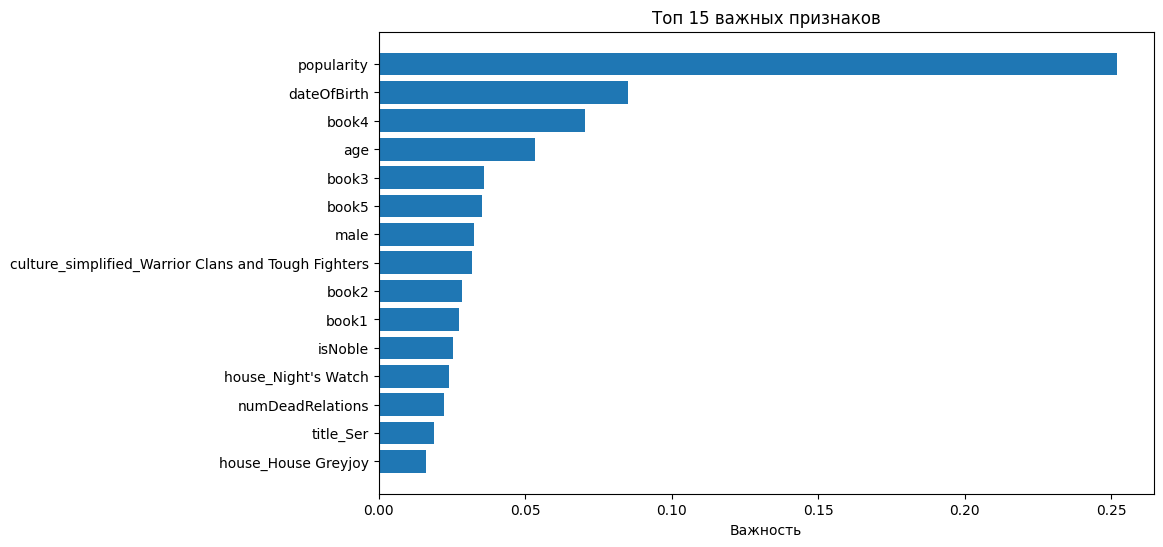

In [ ]:
feature_importances = random_forest.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'].iloc[:15], importance_df['Importance'].iloc[:15])
plt.gca().invert_yaxis()
plt.xlabel('Важность')
plt.title('Топ 15 важных признаков')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)

random_forest_best = grid_search.best_estimator_


{'class_weight': None, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
random_forest_best.fit(X_train, y_train)

y_pred_train = random_forest_best.predict(X_train)
y_pred_test = random_forest_best.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy train: %.4f" % accuracy_train)
print("Accuracy test: %.4f" % accuracy_test)

Accuracy train: 0.9541

Accuracy test: 0.7814


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer

def add_features(df):
    df['isPopular'] = (df['popularity'] > 0.5).astype(int)
    df['boolDeadRelations'] = (df['numDeadRelations'] > 0).astype(int)
    return df


def simplify_culture_feature(df):
    df['culture_simplified'] = df['culture'].apply(simplify_culture, args=(cult,))
    df['culture_simplified'] = df['culture_simplified'].apply(simplify_culture, args=(survival_groups,))
    return df


def drop_columns(df):
    return df.drop(columns=['name', 'mother', 'father', 'heir', 'spouse', 'culture',
                            'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse'])

def fillna_with_other(df):
    return df.fillna('Other')


numeric_features = ['age', 'dateOfBirth']
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5))
])

categorical_features = ['title', 'culture_simplified', 'house']
categorical_transformer = Pipeline(steps=[
    ('imputer', FunctionTransformer(fillna_with_other)),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop=None))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

pipeline = Pipeline(steps=[
    ('add_features', FunctionTransformer(add_features)),
    ('simplify_culture', FunctionTransformer(simplify_culture_feature)),
    ('drop_columns', FunctionTransformer(drop_columns)),
    ('preprocessor', preprocessor),
    ('classifier', random_forest_best)
])

In [ ]:
train_data = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')
test_data = pd.read_csv('game_of_thrones_test.csv', index_col='S.No')

In [ ]:
X = train_data.drop(['isAlive'], axis=1)
y = train_data['isAlive']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, shuffle=True)

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('add_features',
                 FunctionTransformer(func=<function add_features at 0x7e9213536c20>)),
                ('simplify_culture',
                 FunctionTransformer(func=<function simplify_culture_feature at 0x7e9213535360>)),
                ('drop_columns',
                 FunctionTransformer(func=<function drop_columns at 0x7e92135364d0>)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer())]),
                                                  ['age', 'dateOfBirth']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   FunctionTransformer(func=<function fillna_with_other at 0x7e9213537520>)),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['title',
                                                   'culture_simplified',
                                                   'house'])])),
                ('classifier',
                 RandomForestClassifier(min_samples_split=5,
                                        n_estimators=200))])

In [ ]:
import joblib

joblib.dump(pipeline, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy train: %.4f" % accuracy_train)
print("Accuracy test: %.4f" % accuracy_test)

In [ ]:
test_predict = pipeline.predict(test_data)

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission

Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission['isAlive'] = test_predict

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)

Поиграемся :)

In [ ]:
display(test_data.shape)
test_data[['age', 'dateOfBirth']].isna().sum()

In [ ]:
mask = test_data['age'] + test_data['dateOfBirth'] < 305
indices = test_data[mask].index
submission.loc[indices, 'isAlive'] = 0

In [ ]:
mask = test['age'] + test['dateOfBirth'] >= 305
indices = test_data[mask].index
submission.loc[indices, 'isAlive'] = 1

In [ ]:
submission

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)